# Keras - Advanced (Bessaker)

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_bessaker_advanced.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 68 columns):
BESS-Bessakerfj.-G1-T4015A3 -0104    5237 non-null float64
RRS.S2464.Gunit.M1-7 G1.AVL          5237 non-null int64
BESS-Bessakerfj.-G2-T4015A3 -0104    5237 non-null float64
RRS.S2464.Gunit.M1-7 G2.AVL          5237 non-null int64
BESS-Bessakerfj.-G3-T4015A3 -0104    5237 non-null float64
RRS.S2464.Gunit.M1-7 G3.AVL          5237 non-null int64
BESS-Bessakerfj.-G4-T4015A3 -0104    5237 non-null float64
RRS.S2464.Gunit.M1-7 G4.AVL          5237 non-null int64
BESS-Bessakerfj.-G5-T4015A3 -0104    5237 non-null float64
RRS.S2464.Gunit.M1-7 G5.AVL          5237 non-null int64
BESS-Bessakerfj.-G6-T4015A3 -0104    5237 non-null float64
RRS.S2464.Gunit.M1-7 G6.AVL          5237 non-null int64
BESS-Bessakerfj.-G7-T4015A3 -0104    5237 non-null float64
RRS.S2464.Gunit.M1-7 G7.AVL          5237 non-null int64
BESS-Bessakerfj.-G8-T4015A3 -0104    5237 non-null float64
RRS.S2464.Gunit.M1-7 G

In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5187 entries, 0 to 5236
Data columns (total 68 columns):
BESS-Bessakerfj.-G1-T4015A3 -0104    5187 non-null float64
RRS.S2464.Gunit.M1-7 G1.AVL          5187 non-null int64
BESS-Bessakerfj.-G2-T4015A3 -0104    5187 non-null float64
RRS.S2464.Gunit.M1-7 G2.AVL          5187 non-null int64
BESS-Bessakerfj.-G3-T4015A3 -0104    5187 non-null float64
RRS.S2464.Gunit.M1-7 G3.AVL          5187 non-null int64
BESS-Bessakerfj.-G4-T4015A3 -0104    5187 non-null float64
RRS.S2464.Gunit.M1-7 G4.AVL          5187 non-null int64
BESS-Bessakerfj.-G5-T4015A3 -0104    5187 non-null float64
RRS.S2464.Gunit.M1-7 G5.AVL          5187 non-null int64
BESS-Bessakerfj.-G6-T4015A3 -0104    5187 non-null float64
RRS.S2464.Gunit.M1-7 G6.AVL          5187 non-null int64
BESS-Bessakerfj.-G7-T4015A3 -0104    5187 non-null float64
RRS.S2464.Gunit.M1-7 G7.AVL          5187 non-null int64
BESS-Bessakerfj.-G8-T4015A3 -0104    5187 non-null float64
RRS.S2464.Gunit.M1-7 G

In [4]:
num_features = len(data.columns) -1
print(num_features)

67


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

In [6]:
# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

In [7]:
# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

In [60]:
from sklearn import metrics
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y, x[:,0]))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y, x[:,(num_features -1)]))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y, x[:,0])))

Mean Absolute Error: 			 20.4281
Mean Squared Error: 			 553.067
Root Mean Squared Error: 		 27.0364


#### Train/test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

#### Skalere data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Lage en scaler
scaler = MinMaxScaler()

In [13]:
# Anvende på features, her lagret i variablen x.
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# Keras

In [14]:
import tensorflow as tf

#### Importere modellen

In [15]:
from tensorflow.contrib.keras import models

In [16]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [17]:
from tensorflow.contrib.keras import layers

In [18]:
# Input layer
dnn_keras_model.add(layers.Dense(units=128, input_dim= num_features, activation='relu'))

In [19]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=64,activation='relu'))

dnn_keras_model.add(layers.Dense(units=32,activation='relu'))

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [20]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [21]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [22]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [23]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [24]:
from tensorflow.contrib.keras import callbacks

In [25]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_bessaker_advanced.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [26]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 5000, batch_size=50, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3630 samples, validate on 1557 samples
Epoch 1/5000
Epoch 00000: val_loss improved from inf to 4.61277, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 7.3826 - val_loss: 4.6128
Epoch 2/5000
Epoch 00001: val_loss did not improve
0s - loss: 4.6462 - val_loss: 4.7276
Epoch 3/5000
Epoch 00002: val_loss improved from 4.61277 to 4.41924, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 4.5832 - val_loss: 4.4192
Epoch 4/5000
Epoch 00003: val_loss did not improve
0s - loss: 4.5057 - val_loss: 4.5370
Epoch 5/5000
Epoch 00004: val_loss improved from 4.41924 to 4.32119, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 4.3870 - val_loss: 4.3212
Epoch 6/5000
Epoch 00005: val_loss improved from 4.32119 to 4.30966, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 4.4297 - val_loss: 4.3097
Epoch 7/5000
Epoch 00006: val_loss did not improve
0s - loss: 4.5740 - val_loss: 4.3625
Epoch 8/5000
Epoch 00007: val_loss did not improve
0

Epoch 00079: val_loss did not improve
0s - loss: 3.7165 - val_loss: 3.9999
Epoch 81/5000
Epoch 00080: val_loss did not improve
0s - loss: 3.7016 - val_loss: 4.1122
Epoch 82/5000
Epoch 00081: val_loss did not improve
0s - loss: 3.8700 - val_loss: 4.4795
Epoch 83/5000
Epoch 00082: val_loss did not improve
0s - loss: 3.8083 - val_loss: 4.0223
Epoch 84/5000
Epoch 00083: val_loss did not improve
0s - loss: 3.6812 - val_loss: 4.0284
Epoch 85/5000
Epoch 00084: val_loss did not improve
0s - loss: 3.7175 - val_loss: 4.1590
Epoch 86/5000
Epoch 00085: val_loss did not improve
0s - loss: 3.6308 - val_loss: 4.0316
Epoch 87/5000
Epoch 00086: val_loss did not improve
0s - loss: 3.7211 - val_loss: 4.0338
Epoch 88/5000
Epoch 00087: val_loss did not improve
0s - loss: 3.6976 - val_loss: 4.0505
Epoch 89/5000
Epoch 00088: val_loss did not improve
0s - loss: 3.6993 - val_loss: 4.0901
Epoch 90/5000
Epoch 00089: val_loss improved from 3.98458 to 3.98342, saving model to checkpoint_model_bessaker_advanced.h5


Epoch 00163: val_loss did not improve
0s - loss: 3.2752 - val_loss: 4.0613
Epoch 165/5000
Epoch 00164: val_loss did not improve
0s - loss: 3.2772 - val_loss: 3.8846
Epoch 166/5000
Epoch 00165: val_loss did not improve
0s - loss: 3.2513 - val_loss: 4.0175
Epoch 167/5000
Epoch 00166: val_loss did not improve
0s - loss: 3.3331 - val_loss: 3.8904
Epoch 168/5000
Epoch 00167: val_loss did not improve
0s - loss: 3.2530 - val_loss: 3.9957
Epoch 169/5000
Epoch 00168: val_loss did not improve
0s - loss: 3.2559 - val_loss: 3.8798
Epoch 170/5000
Epoch 00169: val_loss did not improve
0s - loss: 3.2677 - val_loss: 4.0553
Epoch 171/5000
Epoch 00170: val_loss did not improve
0s - loss: 3.3634 - val_loss: 4.1367
Epoch 172/5000
Epoch 00171: val_loss did not improve
0s - loss: 3.2089 - val_loss: 4.1105
Epoch 173/5000
Epoch 00172: val_loss did not improve
0s - loss: 3.2184 - val_loss: 3.9287
Epoch 174/5000
Epoch 00173: val_loss did not improve
0s - loss: 3.2289 - val_loss: 4.0000
Epoch 175/5000
Epoch 0017

Epoch 00253: val_loss did not improve
0s - loss: 2.7910 - val_loss: 3.8539
Epoch 255/5000
Epoch 00254: val_loss did not improve
0s - loss: 2.8180 - val_loss: 3.9976
Epoch 256/5000
Epoch 00255: val_loss did not improve
0s - loss: 2.7801 - val_loss: 3.8099
Epoch 257/5000
Epoch 00256: val_loss did not improve
0s - loss: 2.7983 - val_loss: 3.9559
Epoch 258/5000
Epoch 00257: val_loss did not improve
0s - loss: 2.8389 - val_loss: 3.9749
Epoch 259/5000
Epoch 00258: val_loss did not improve
0s - loss: 2.7902 - val_loss: 3.9836
Epoch 260/5000
Epoch 00259: val_loss did not improve
0s - loss: 2.7447 - val_loss: 3.7929
Epoch 261/5000
Epoch 00260: val_loss did not improve
0s - loss: 2.7666 - val_loss: 3.9665
Epoch 262/5000
Epoch 00261: val_loss did not improve
0s - loss: 2.8912 - val_loss: 3.9240
Epoch 263/5000
Epoch 00262: val_loss did not improve
0s - loss: 2.7464 - val_loss: 4.1620
Epoch 264/5000
Epoch 00263: val_loss did not improve
0s - loss: 2.7977 - val_loss: 3.8165
Epoch 265/5000
Epoch 0026

Epoch 00343: val_loss did not improve
0s - loss: 2.4348 - val_loss: 3.9197
Epoch 345/5000
Epoch 00344: val_loss did not improve
0s - loss: 2.3792 - val_loss: 3.7990
Epoch 346/5000
Epoch 00345: val_loss did not improve
0s - loss: 2.4556 - val_loss: 3.8454
Epoch 347/5000
Epoch 00346: val_loss did not improve
0s - loss: 2.4417 - val_loss: 3.8082
Epoch 348/5000
Epoch 00347: val_loss did not improve
0s - loss: 2.3484 - val_loss: 3.8365
Epoch 349/5000
Epoch 00348: val_loss did not improve
0s - loss: 2.4479 - val_loss: 3.9078
Epoch 350/5000
Epoch 00349: val_loss did not improve
0s - loss: 2.4172 - val_loss: 3.9110
Epoch 351/5000
Epoch 00350: val_loss did not improve
0s - loss: 2.3579 - val_loss: 3.8884
Epoch 352/5000
Epoch 00351: val_loss did not improve
0s - loss: 2.4039 - val_loss: 3.8572
Epoch 353/5000
Epoch 00352: val_loss improved from 3.77222 to 3.76889, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 2.3636 - val_loss: 3.7689
Epoch 354/5000
Epoch 00353: val_loss did no

Epoch 00434: val_loss did not improve
0s - loss: 2.1745 - val_loss: 3.8102
Epoch 436/5000
Epoch 00435: val_loss did not improve
0s - loss: 2.1174 - val_loss: 3.8925
Epoch 437/5000
Epoch 00436: val_loss improved from 3.75519 to 3.73070, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 2.0542 - val_loss: 3.7307
Epoch 438/5000
Epoch 00437: val_loss did not improve
0s - loss: 2.0565 - val_loss: 3.9154
Epoch 439/5000
Epoch 00438: val_loss did not improve
0s - loss: 2.1131 - val_loss: 3.9274
Epoch 440/5000
Epoch 00439: val_loss did not improve
0s - loss: 2.1074 - val_loss: 3.8946
Epoch 441/5000
Epoch 00440: val_loss did not improve
0s - loss: 2.0707 - val_loss: 3.8151
Epoch 442/5000
Epoch 00441: val_loss did not improve
0s - loss: 2.0741 - val_loss: 3.7934
Epoch 443/5000
Epoch 00442: val_loss did not improve
0s - loss: 2.1664 - val_loss: 4.0082
Epoch 444/5000
Epoch 00443: val_loss did not improve
0s - loss: 2.1383 - val_loss: 3.9307
Epoch 445/5000
Epoch 00444: val_loss did no

Epoch 00525: val_loss did not improve
0s - loss: 1.9716 - val_loss: 3.8223
Epoch 527/5000
Epoch 00526: val_loss did not improve
0s - loss: 1.9149 - val_loss: 3.8439
Epoch 528/5000
Epoch 00527: val_loss did not improve
0s - loss: 1.9471 - val_loss: 3.8945
Epoch 529/5000
Epoch 00528: val_loss did not improve
0s - loss: 1.8322 - val_loss: 3.8480
Epoch 530/5000
Epoch 00529: val_loss did not improve
0s - loss: 1.8542 - val_loss: 3.8378
Epoch 531/5000
Epoch 00530: val_loss did not improve
0s - loss: 1.9083 - val_loss: 3.8419
Epoch 532/5000
Epoch 00531: val_loss did not improve
0s - loss: 1.8685 - val_loss: 3.9066
Epoch 533/5000
Epoch 00532: val_loss did not improve
0s - loss: 1.8830 - val_loss: 3.8758
Epoch 534/5000
Epoch 00533: val_loss did not improve
0s - loss: 1.8851 - val_loss: 3.8914
Epoch 535/5000
Epoch 00534: val_loss did not improve
0s - loss: 1.9716 - val_loss: 3.8339
Epoch 536/5000
Epoch 00535: val_loss did not improve
0s - loss: 1.8376 - val_loss: 3.8378
Epoch 537/5000
Epoch 0053

Epoch 00617: val_loss did not improve
0s - loss: 1.7046 - val_loss: 3.9356
Epoch 619/5000
Epoch 00618: val_loss did not improve
0s - loss: 1.8153 - val_loss: 3.9154
Epoch 620/5000
Epoch 00619: val_loss did not improve
0s - loss: 1.7107 - val_loss: 3.8412
Epoch 621/5000
Epoch 00620: val_loss did not improve
0s - loss: 1.7214 - val_loss: 3.8734
Epoch 622/5000
Epoch 00621: val_loss did not improve
0s - loss: 1.7061 - val_loss: 3.8784
Epoch 623/5000
Epoch 00622: val_loss did not improve
0s - loss: 1.7150 - val_loss: 3.8380
Epoch 624/5000
Epoch 00623: val_loss did not improve
0s - loss: 1.7201 - val_loss: 3.8514
Epoch 625/5000
Epoch 00624: val_loss did not improve
0s - loss: 1.7274 - val_loss: 3.9521
Epoch 626/5000
Epoch 00625: val_loss did not improve
0s - loss: 1.7098 - val_loss: 3.9253
Epoch 627/5000
Epoch 00626: val_loss did not improve
0s - loss: 1.7755 - val_loss: 3.8338
Epoch 628/5000
Epoch 00627: val_loss did not improve
0s - loss: 1.7033 - val_loss: 3.8784
Epoch 629/5000
Epoch 0062

Epoch 00709: val_loss did not improve
0s - loss: 1.6343 - val_loss: 3.9092
Epoch 711/5000
Epoch 00710: val_loss did not improve
0s - loss: 1.5746 - val_loss: 3.9325
Epoch 712/5000
Epoch 00711: val_loss did not improve
0s - loss: 1.5893 - val_loss: 3.8360
Epoch 713/5000
Epoch 00712: val_loss did not improve
0s - loss: 1.5809 - val_loss: 3.8786
Epoch 714/5000
Epoch 00713: val_loss did not improve
0s - loss: 1.5366 - val_loss: 3.8416
Epoch 715/5000
Epoch 00714: val_loss did not improve
0s - loss: 1.5631 - val_loss: 3.8902
Epoch 716/5000
Epoch 00715: val_loss did not improve
0s - loss: 1.6103 - val_loss: 4.1035
Epoch 717/5000
Epoch 00716: val_loss did not improve
0s - loss: 1.7240 - val_loss: 3.9930
Epoch 718/5000
Epoch 00717: val_loss did not improve
0s - loss: 1.5891 - val_loss: 3.8337
Epoch 719/5000
Epoch 00718: val_loss did not improve
0s - loss: 1.5612 - val_loss: 3.8571
Epoch 720/5000
Epoch 00719: val_loss did not improve
0s - loss: 1.5605 - val_loss: 3.8446
Epoch 721/5000
Epoch 0072

Epoch 00801: val_loss did not improve
0s - loss: 1.5063 - val_loss: 3.8555
Epoch 803/5000
Epoch 00802: val_loss did not improve
0s - loss: 1.4740 - val_loss: 3.8749
Epoch 804/5000
Epoch 00803: val_loss did not improve
0s - loss: 1.4456 - val_loss: 4.0464
Epoch 805/5000
Epoch 00804: val_loss did not improve
0s - loss: 1.5902 - val_loss: 3.9097
Epoch 806/5000
Epoch 00805: val_loss did not improve
0s - loss: 1.4750 - val_loss: 3.8577
Epoch 807/5000
Epoch 00806: val_loss did not improve
0s - loss: 1.4583 - val_loss: 3.8888
Epoch 808/5000
Epoch 00807: val_loss did not improve
0s - loss: 1.5499 - val_loss: 3.8166
Epoch 809/5000
Epoch 00808: val_loss did not improve
0s - loss: 1.5488 - val_loss: 3.9034
Epoch 810/5000
Epoch 00809: val_loss did not improve
0s - loss: 1.4824 - val_loss: 3.8596
Epoch 811/5000
Epoch 00810: val_loss did not improve
0s - loss: 1.4867 - val_loss: 3.9242
Epoch 812/5000
Epoch 00811: val_loss did not improve
0s - loss: 1.4446 - val_loss: 3.8829
Epoch 813/5000
Epoch 0081

Epoch 00893: val_loss did not improve
0s - loss: 1.5096 - val_loss: 4.0147
Epoch 895/5000
Epoch 00894: val_loss did not improve
0s - loss: 1.4692 - val_loss: 3.9586
Epoch 896/5000
Epoch 00895: val_loss did not improve
0s - loss: 1.4369 - val_loss: 3.9650
Epoch 897/5000
Epoch 00896: val_loss did not improve
0s - loss: 1.4338 - val_loss: 3.8967
Epoch 898/5000
Epoch 00897: val_loss did not improve
0s - loss: 1.4317 - val_loss: 3.9127
Epoch 899/5000
Epoch 00898: val_loss did not improve
0s - loss: 1.4966 - val_loss: 3.9354
Epoch 900/5000
Epoch 00899: val_loss did not improve
0s - loss: 1.4371 - val_loss: 3.8698
Epoch 901/5000
Epoch 00900: val_loss did not improve
0s - loss: 1.4886 - val_loss: 3.9066
Epoch 902/5000
Epoch 00901: val_loss did not improve
0s - loss: 1.3538 - val_loss: 3.9017
Epoch 903/5000
Epoch 00902: val_loss did not improve
0s - loss: 1.4787 - val_loss: 3.8507
Epoch 904/5000
Epoch 00903: val_loss did not improve
0s - loss: 1.4600 - val_loss: 3.8513
Epoch 905/5000
Epoch 0090

# Resultater

In [27]:
from sklearn import metrics

In [28]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_bessaker_advanced.h5')

#### Prediksjon på testsett

In [29]:
final_preds = finished_model.predict(X_test)

In [30]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.7307
Mean Squared Error: 			 38.5436
Root Mean Squared Error: 		 6.20835


#### Prediksjon på treningdata

In [31]:
train_preds = finished_model.predict(X_train)

In [32]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 2.03917
Mean Squared Error: 			 14.4511
Root Mean Squared Error: 		 3.80146


# Visualisere resultater

#### Test data

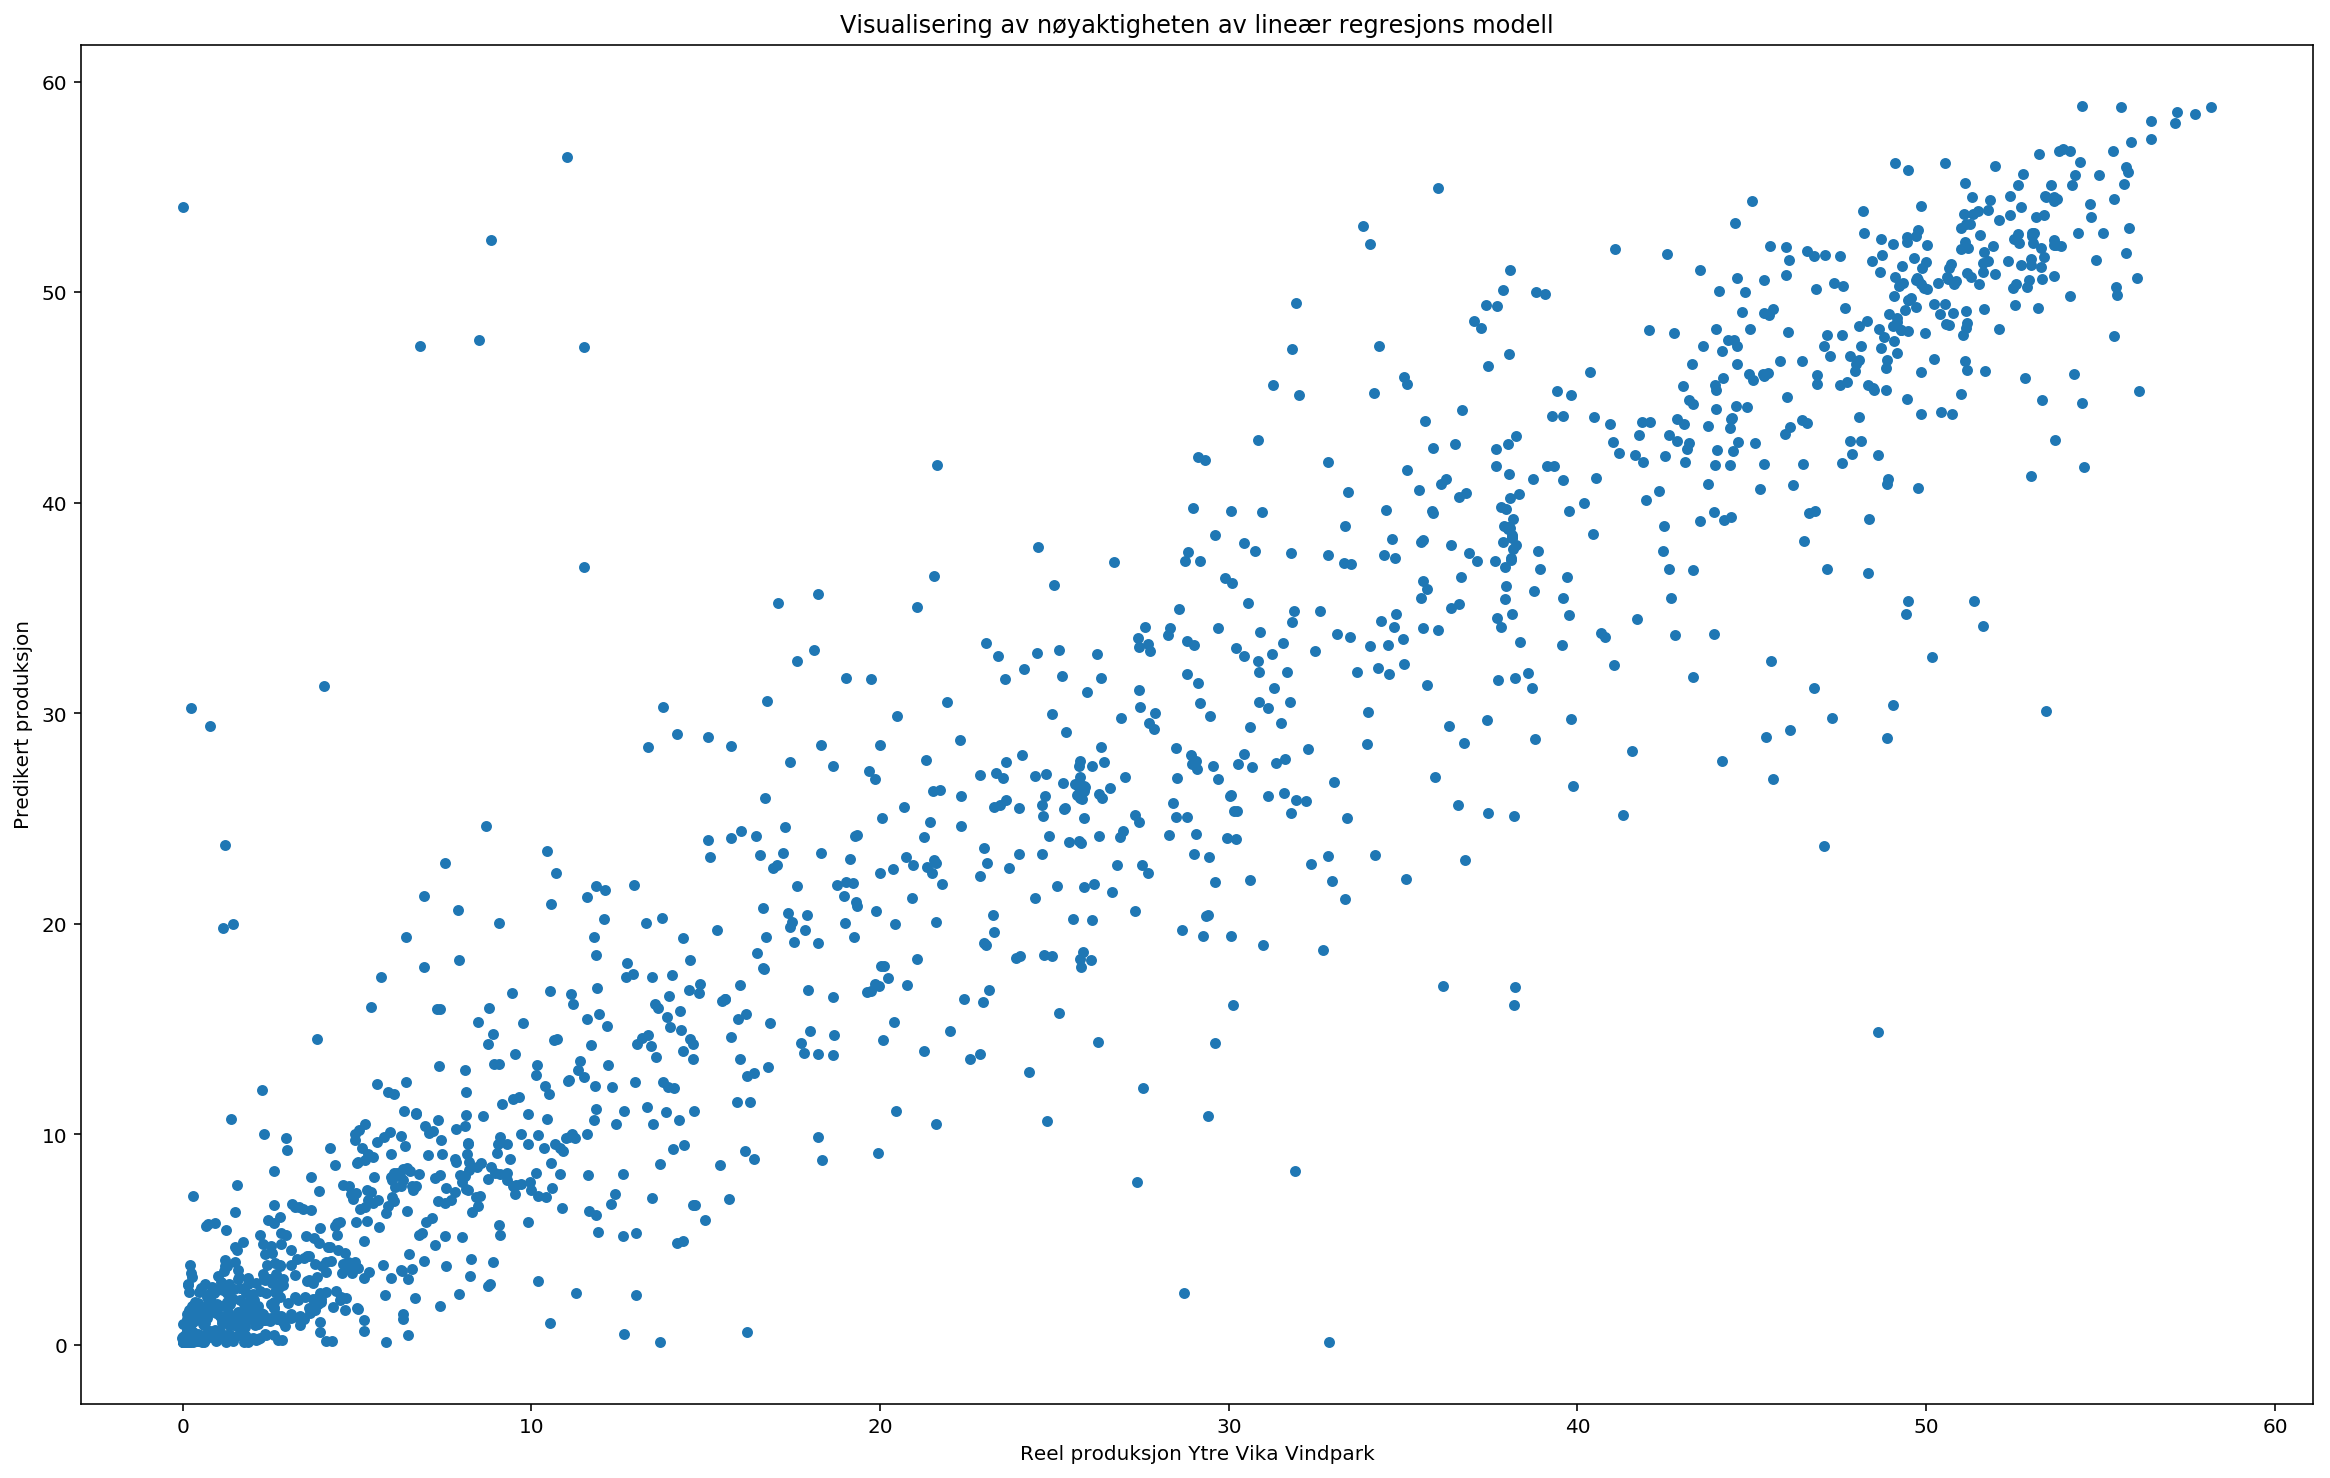

In [33]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,final_preds, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av lineær regresjons modell')

#### Treningsdata + Testdata

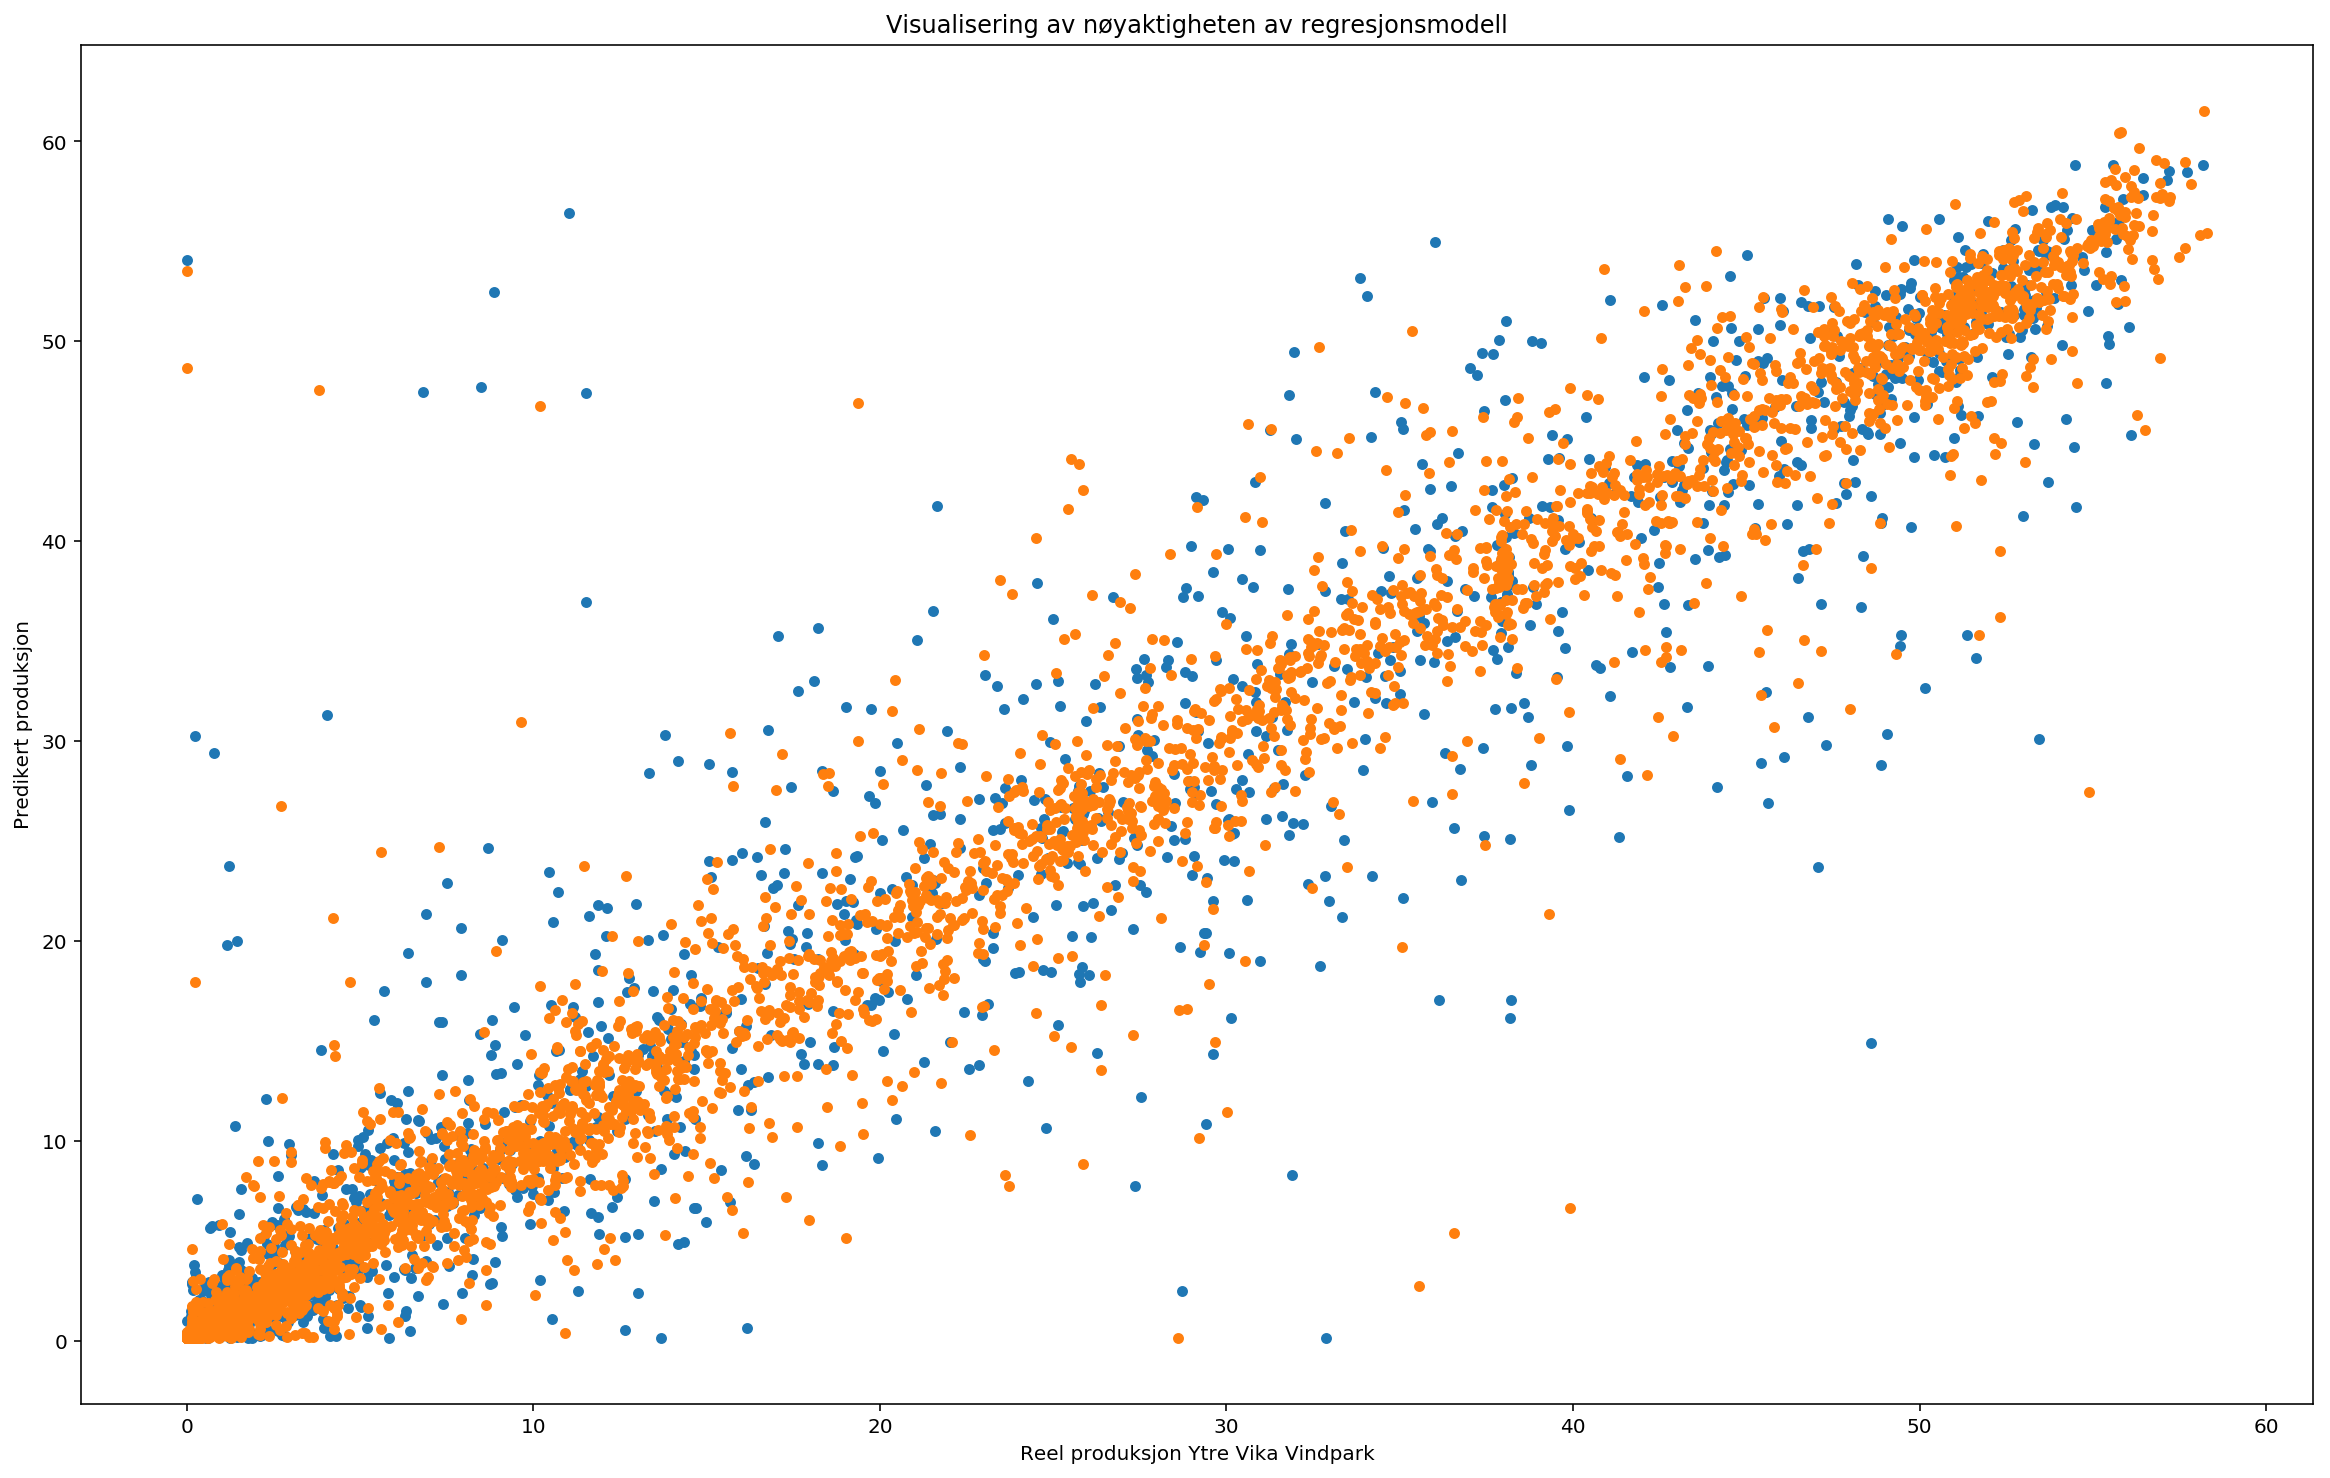

In [34]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,final_preds, s = 20)
plt.scatter(y_train,train_preds, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av regresjonsmodell')

# Ytterligere undersøkelser av resultatene

#### Testdata

In [35]:
predictions = list(final_preds)


predictions_list = []
for pred in predictions:
    predictions_list.append(pred[0])

In [36]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

In [37]:
Oversikt.head(10)

,predicitions,real
0,45.366039,48.502850
1,12.788678,16.184982
2,12.475131,13.764366
3,7.380319,6.604967
4,46.562702,43.294865
5,40.224937,38.061733
6,3.525832,6.288116
7,46.973053,47.233982
8,0.149469,0.194867
9,27.490618,18.652933


In [38]:
Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions']  

In [39]:
Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

In [40]:
Oversikt.head()

,predicitions,real,differanse,abs_diff
0,45.366039,48.502850,3.136810,3.136810
1,12.788678,16.184982,3.396304,3.396304
2,12.475131,13.764366,1.289235,1.289235
3,7.380319,6.604967,-0.775352,0.775352
4,46.562702,43.294865,-3.267838,3.267838


In [41]:
#Oversikt['abs_diff'].hist(bins = 30)

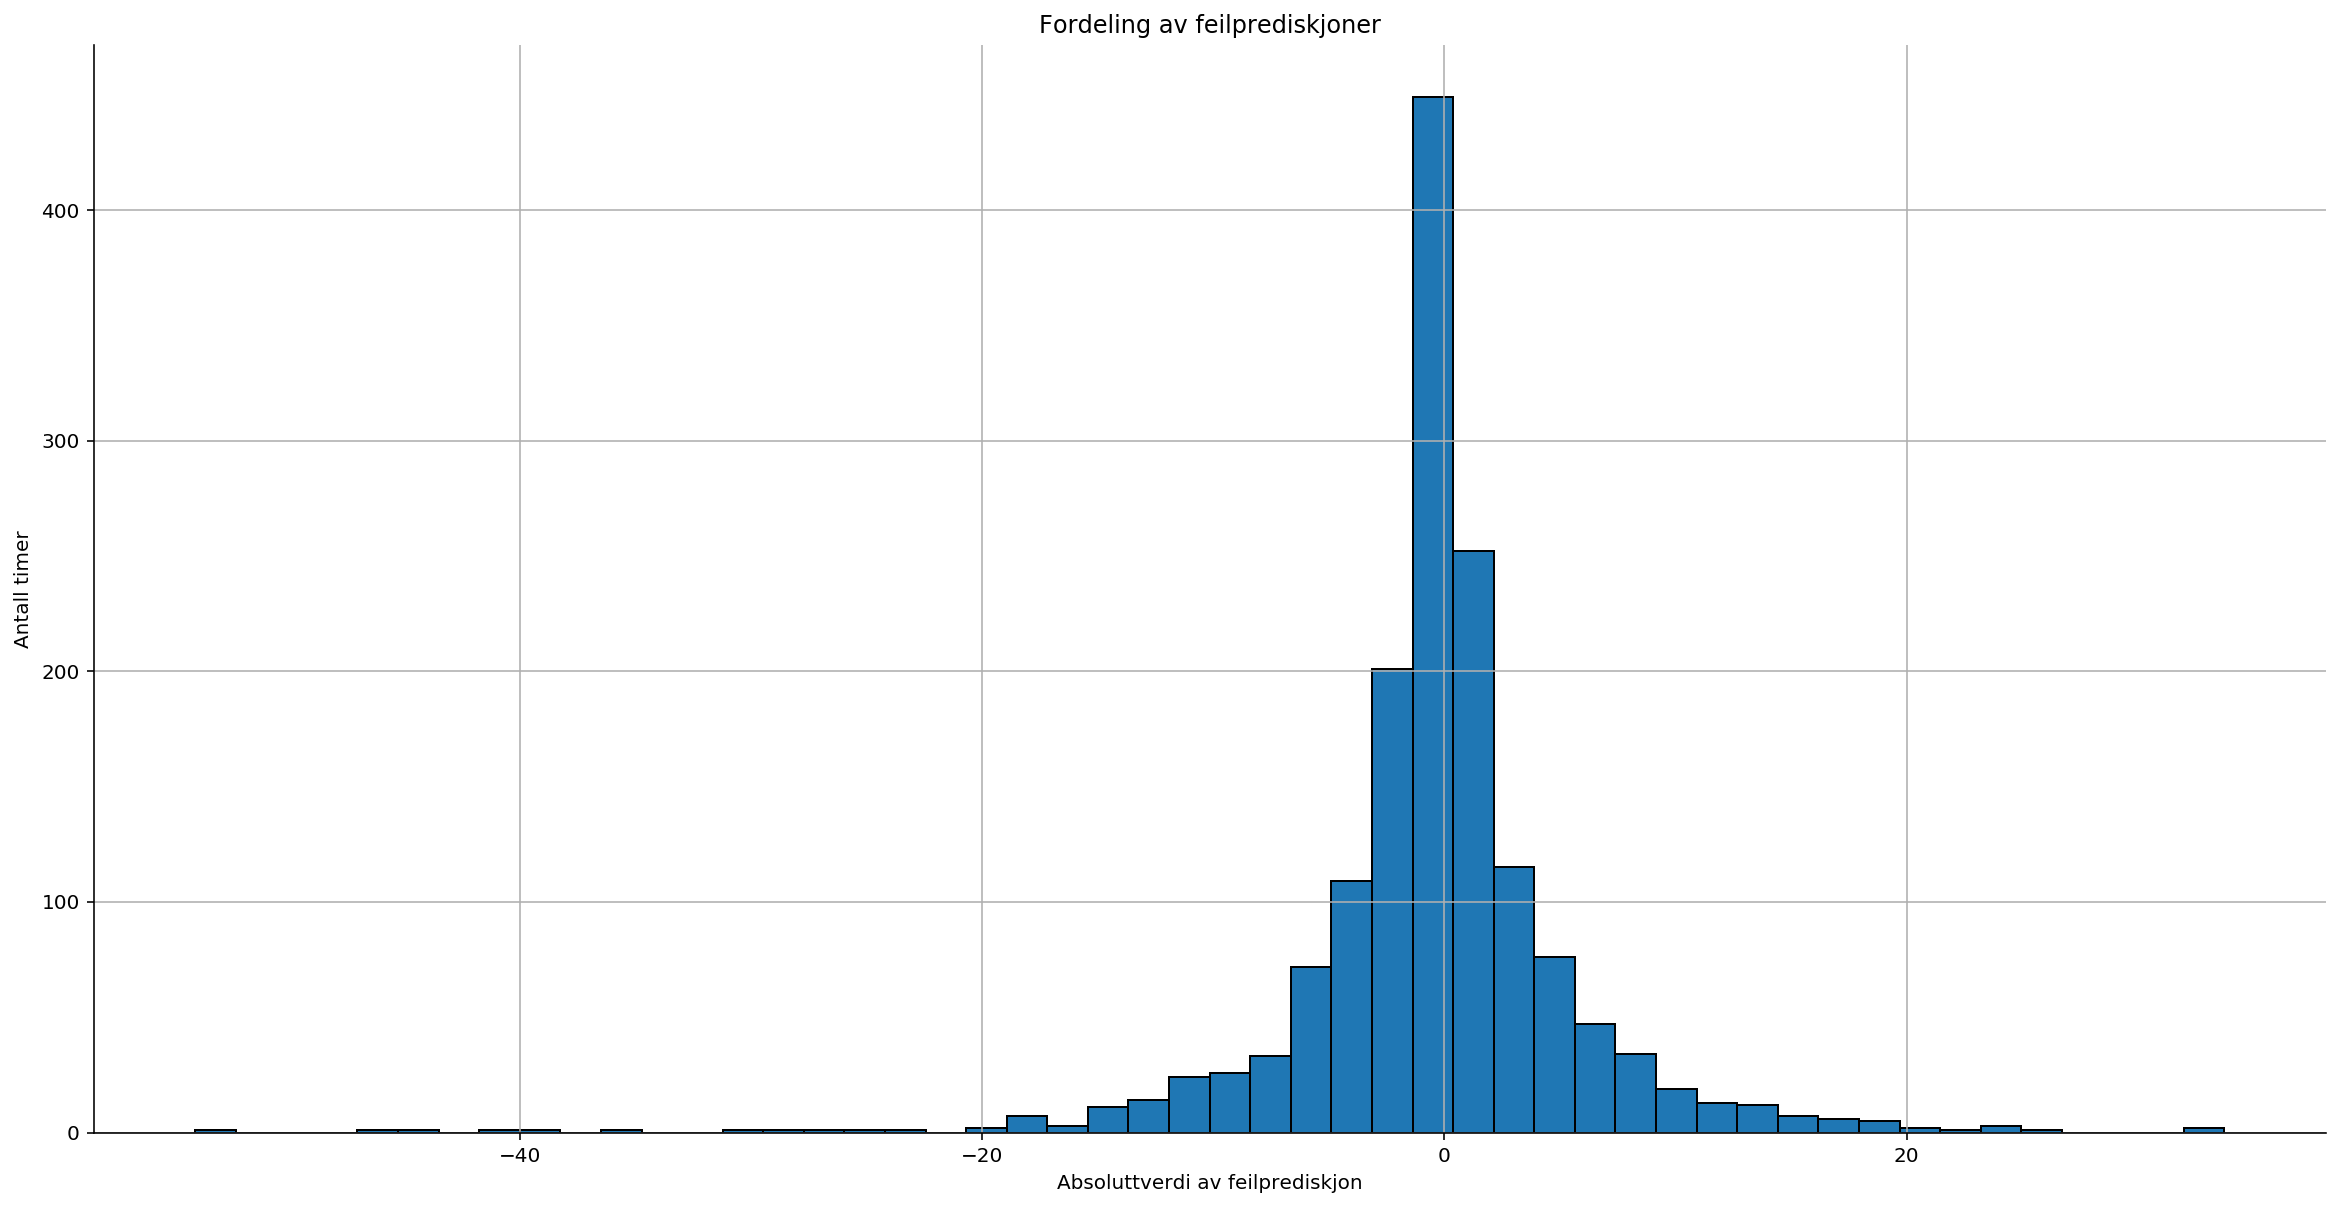

In [42]:
ax = Oversikt['differanse'].hist(bins=50,figsize = (20,10))

plt.xlabel('Absoluttverdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

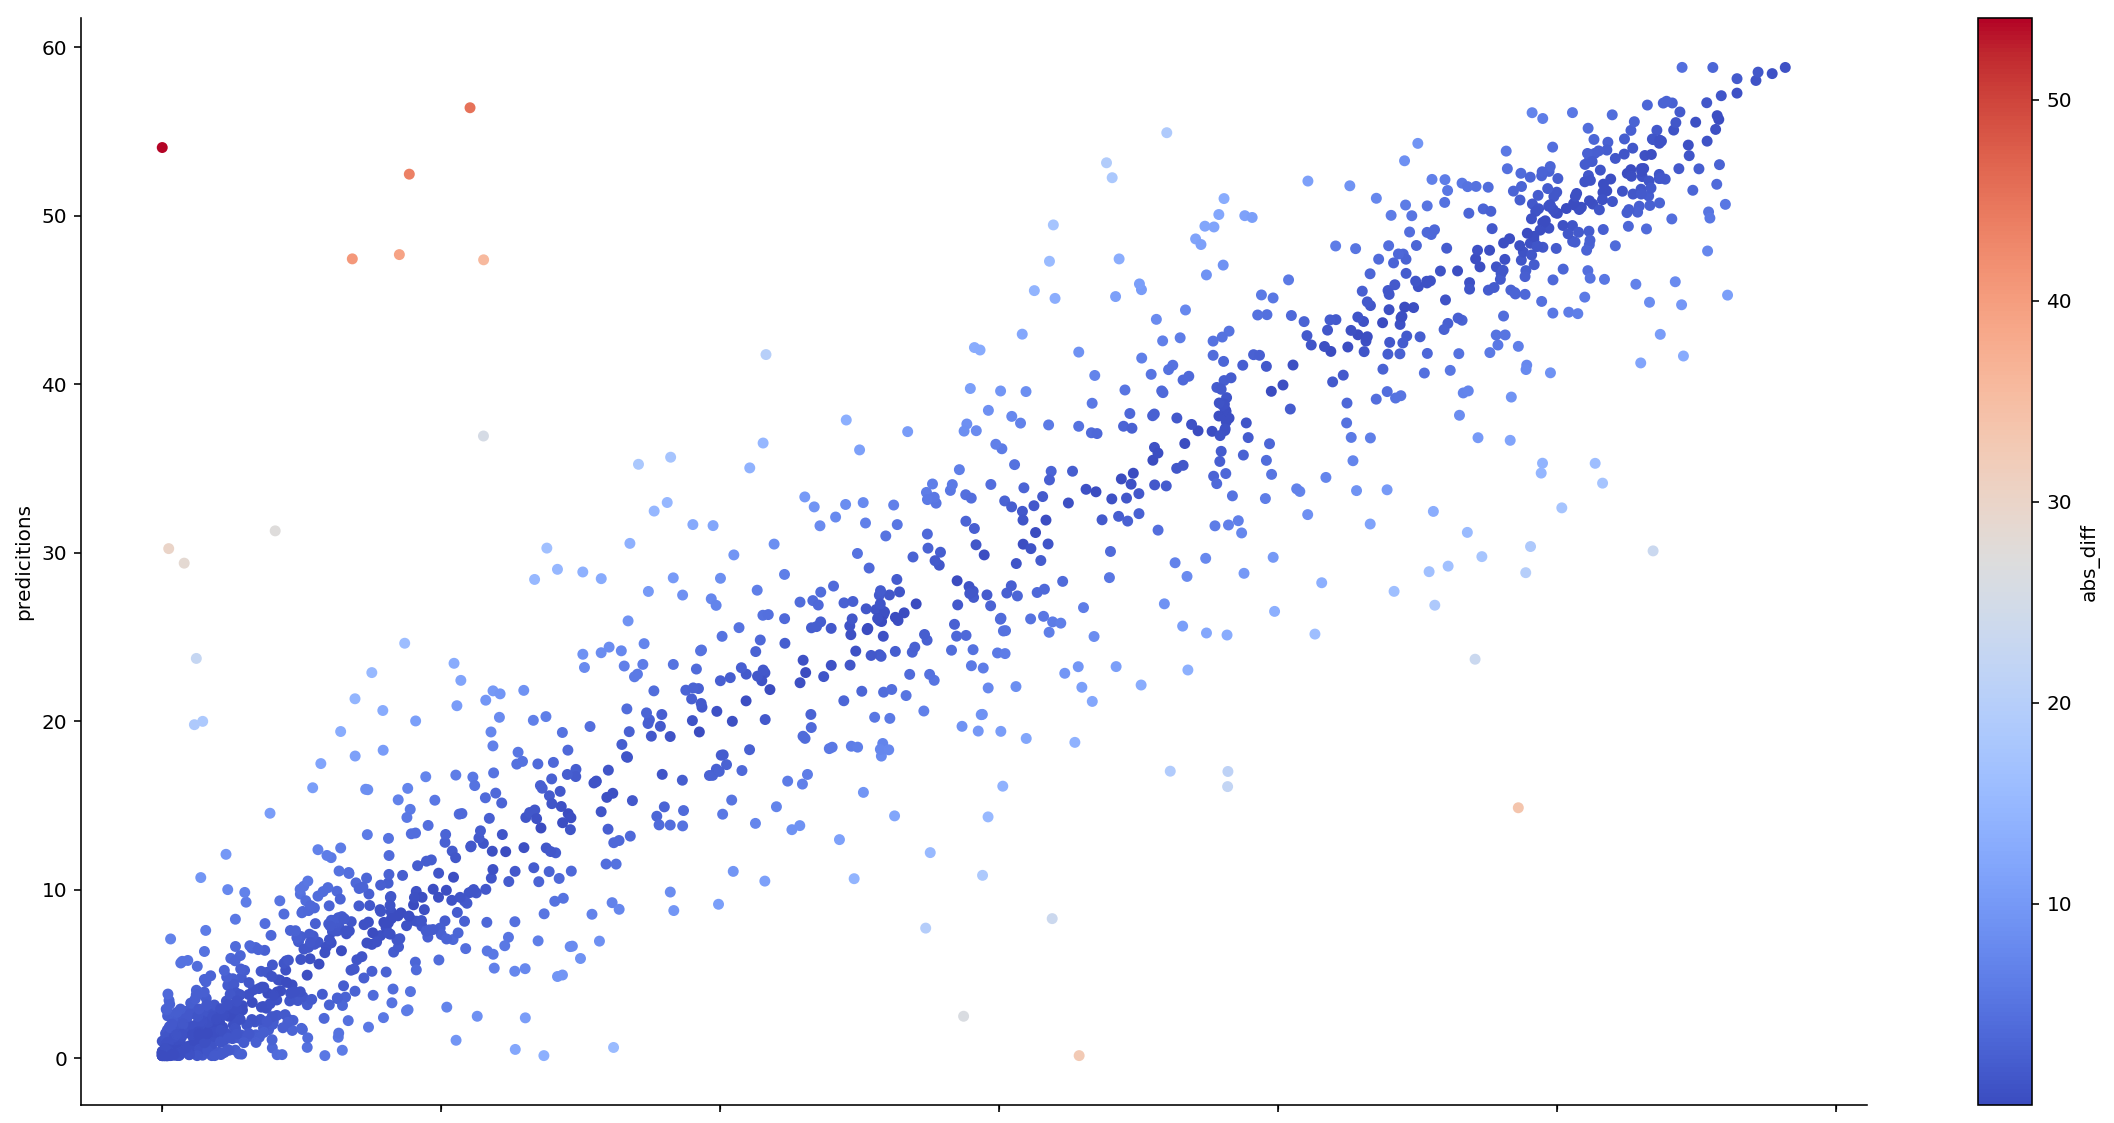

In [43]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

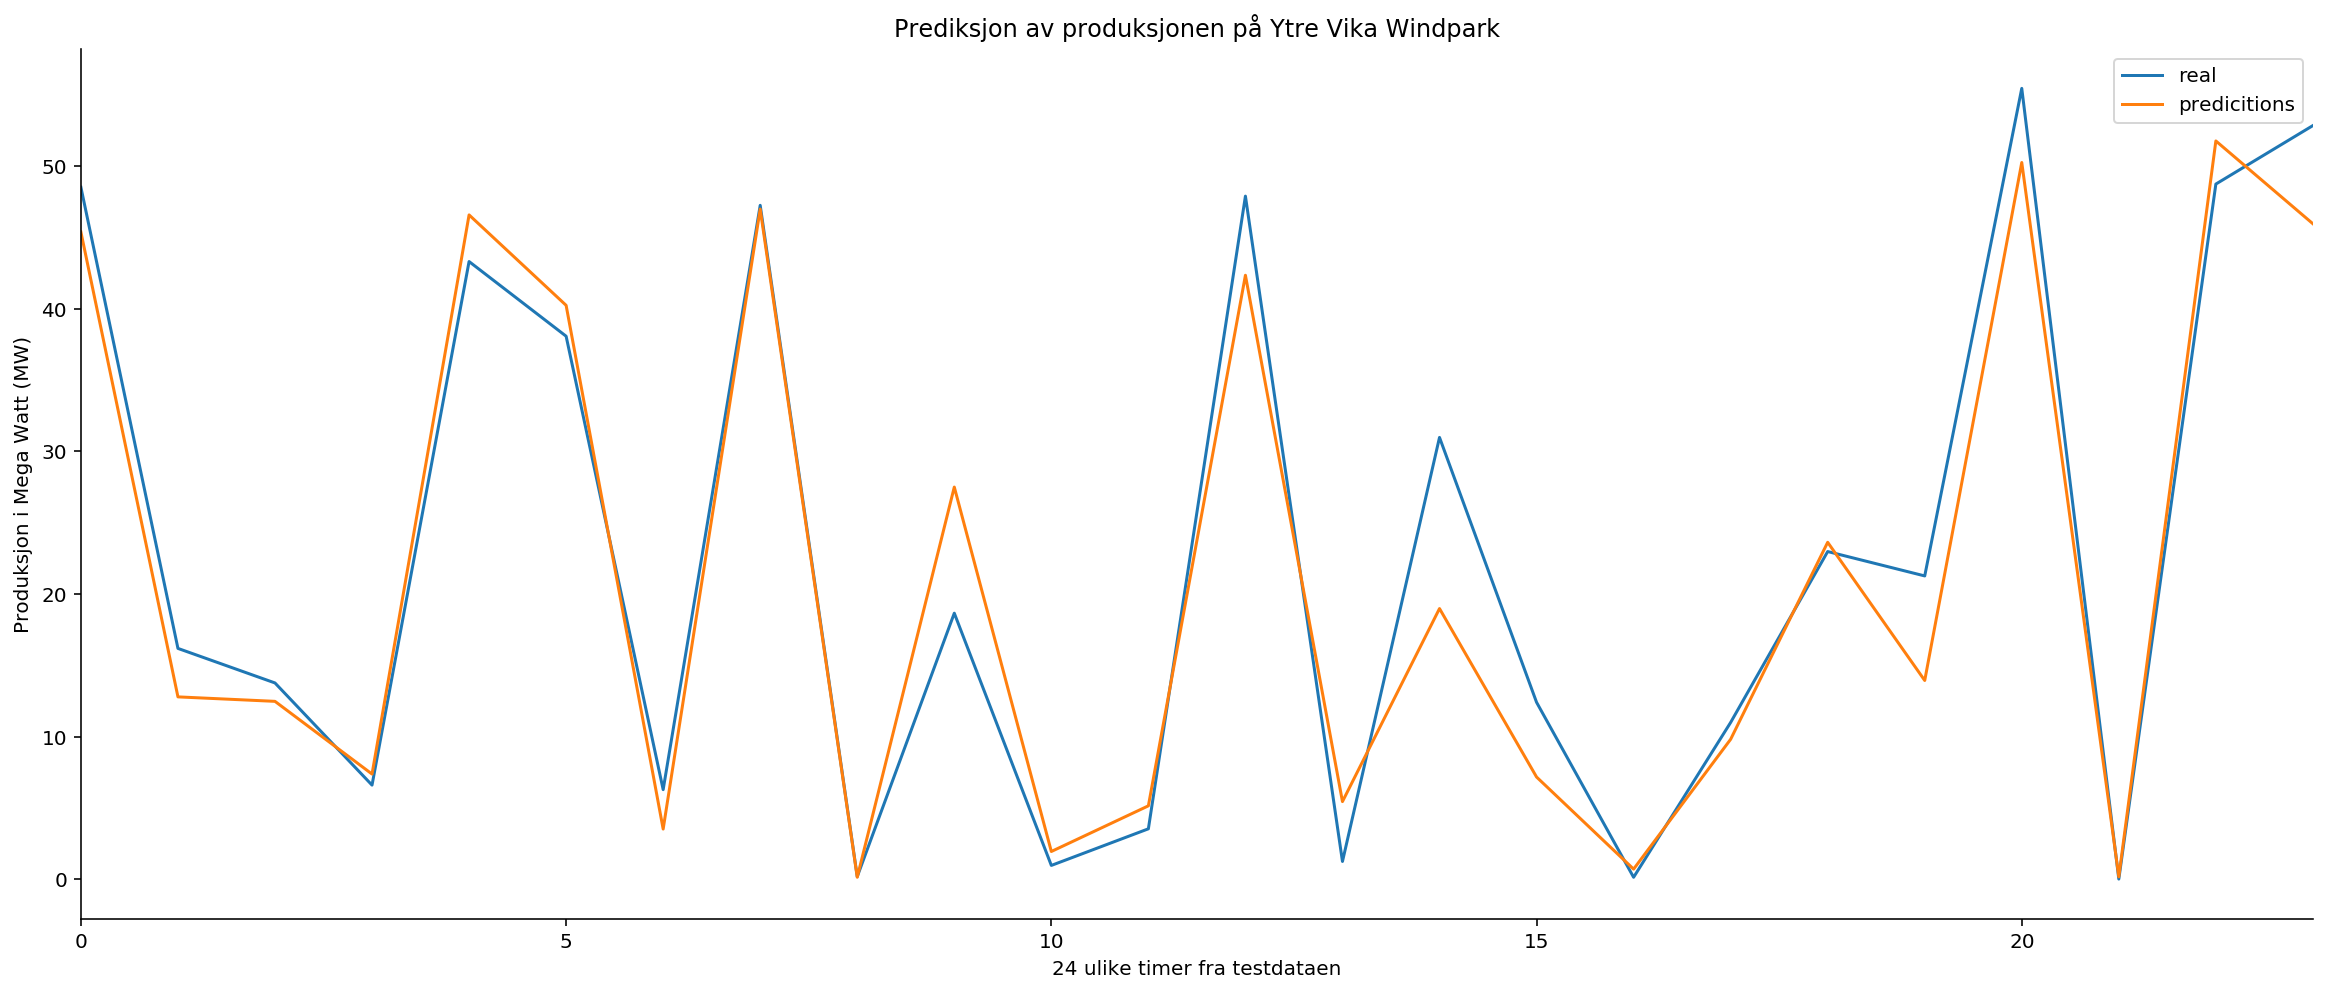

In [44]:
ax = Oversikt['real'].head(24).plot(figsize=(20,8))
ax = Oversikt['predicitions'].head(24).plot(figsize=(20,8))

plt.xlabel('24 ulike timer fra testdataen')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Prediksjon av produksjonen på Ytre Vika Windpark')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('24_punkter.png')

#### Inkludere treningsdata

In [45]:
predictions_train = list(train_preds)


predictions_train_list = []
for pred in predictions_train:
    predictions_train_list.append(pred[0])

In [46]:
Oversikt_trening = pd.DataFrame(data = {'real': y_train, 'predicitions': predictions_train_list})

In [47]:
Oversikt_trening['differanse'] = Oversikt_trening['real'] - Oversikt_trening['predicitions']  
Oversikt_trening['abs_diff'] = Oversikt_trening['differanse'].apply(abs)

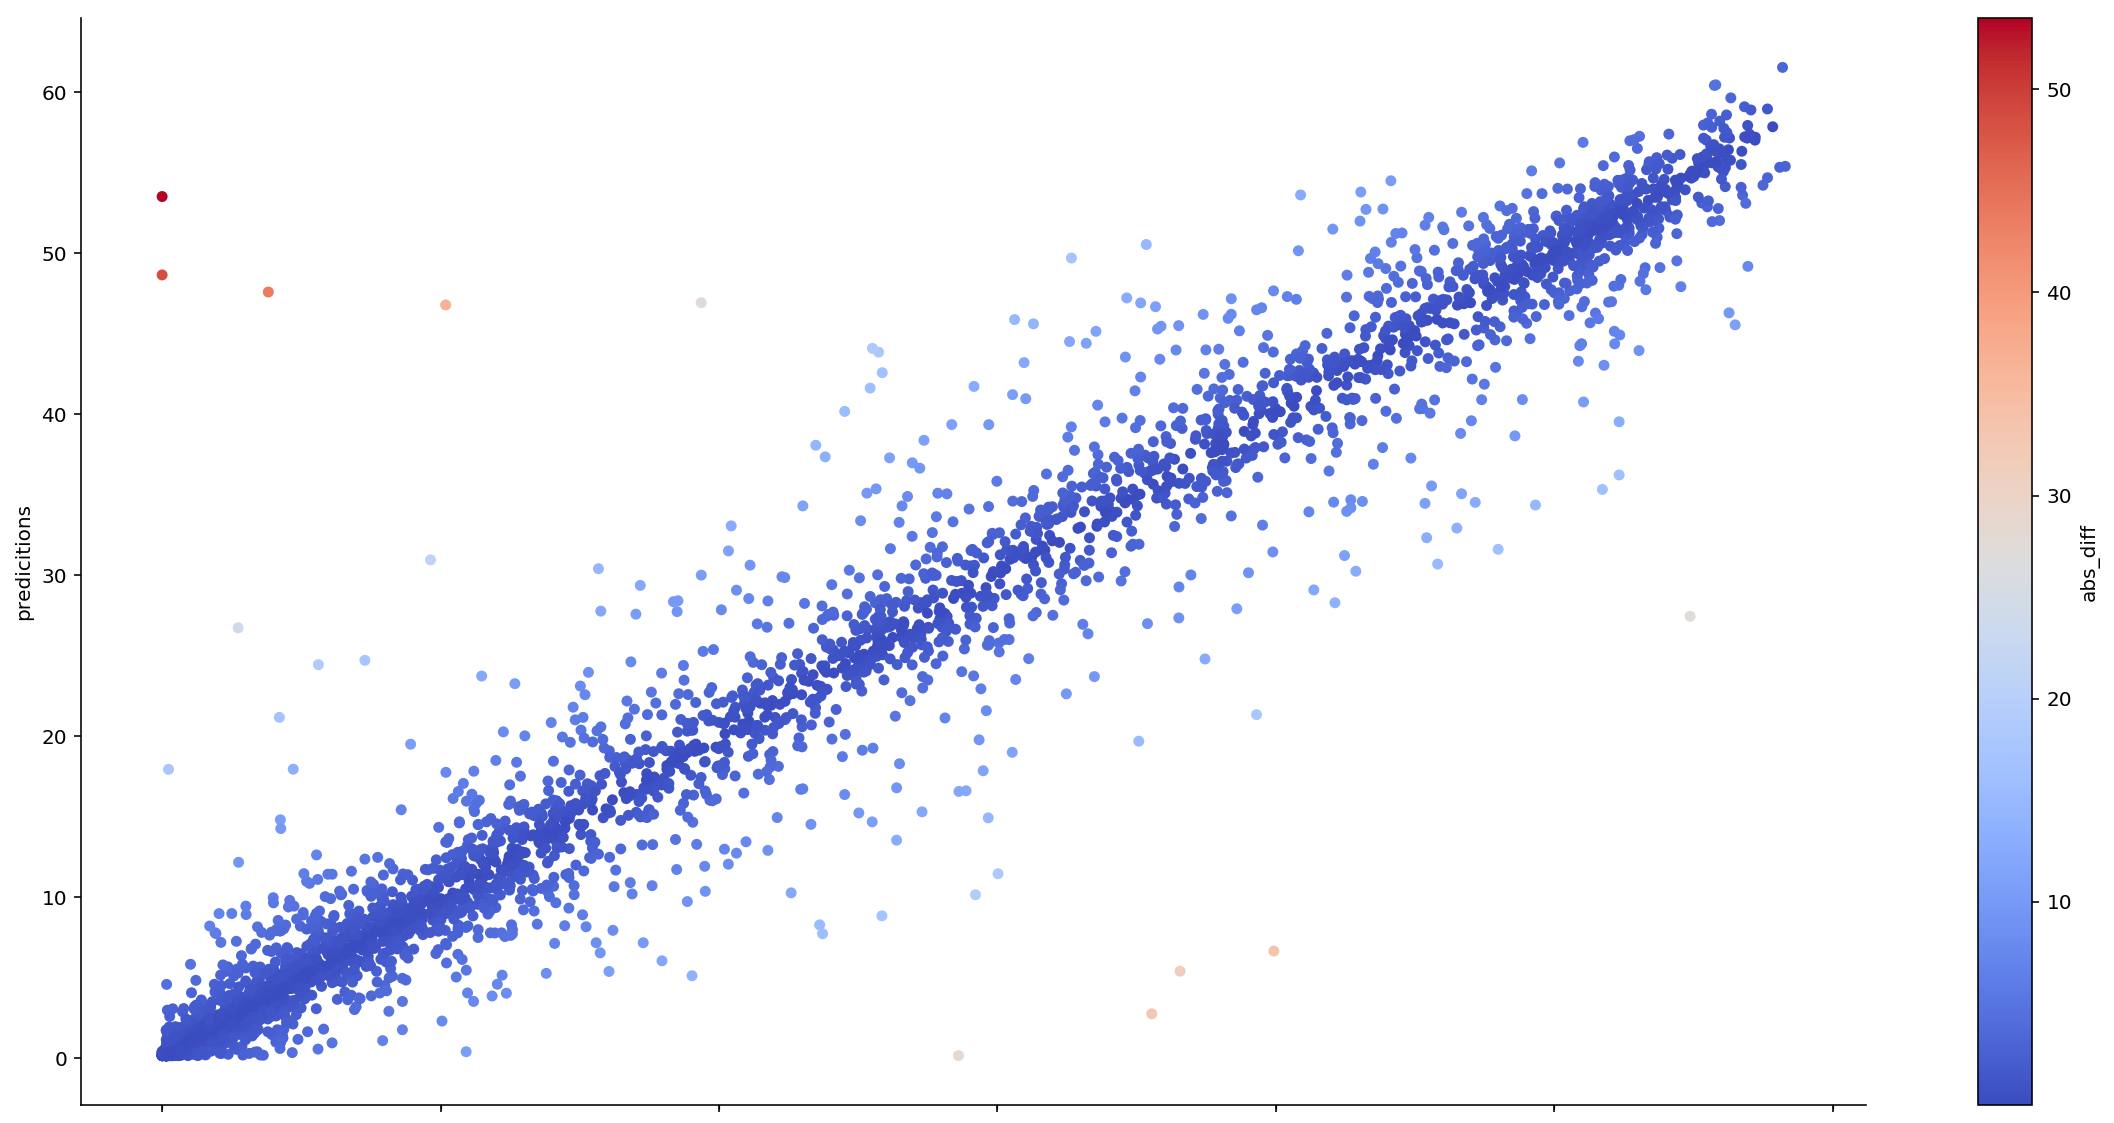

In [48]:
ax = Oversikt_trening.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

 #### Sammenstille og plotte data

In [49]:
Oversikt_komplett = pd.concat([Oversikt,Oversikt_trening])

In [50]:
Oversikt_komplett.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5187 entries, 0 to 3629
Data columns (total 4 columns):
predicitions    5187 non-null float64
real            5187 non-null float32
differanse      5187 non-null float64
abs_diff        5187 non-null float64
dtypes: float32(1), float64(3)
memory usage: 182.4 KB


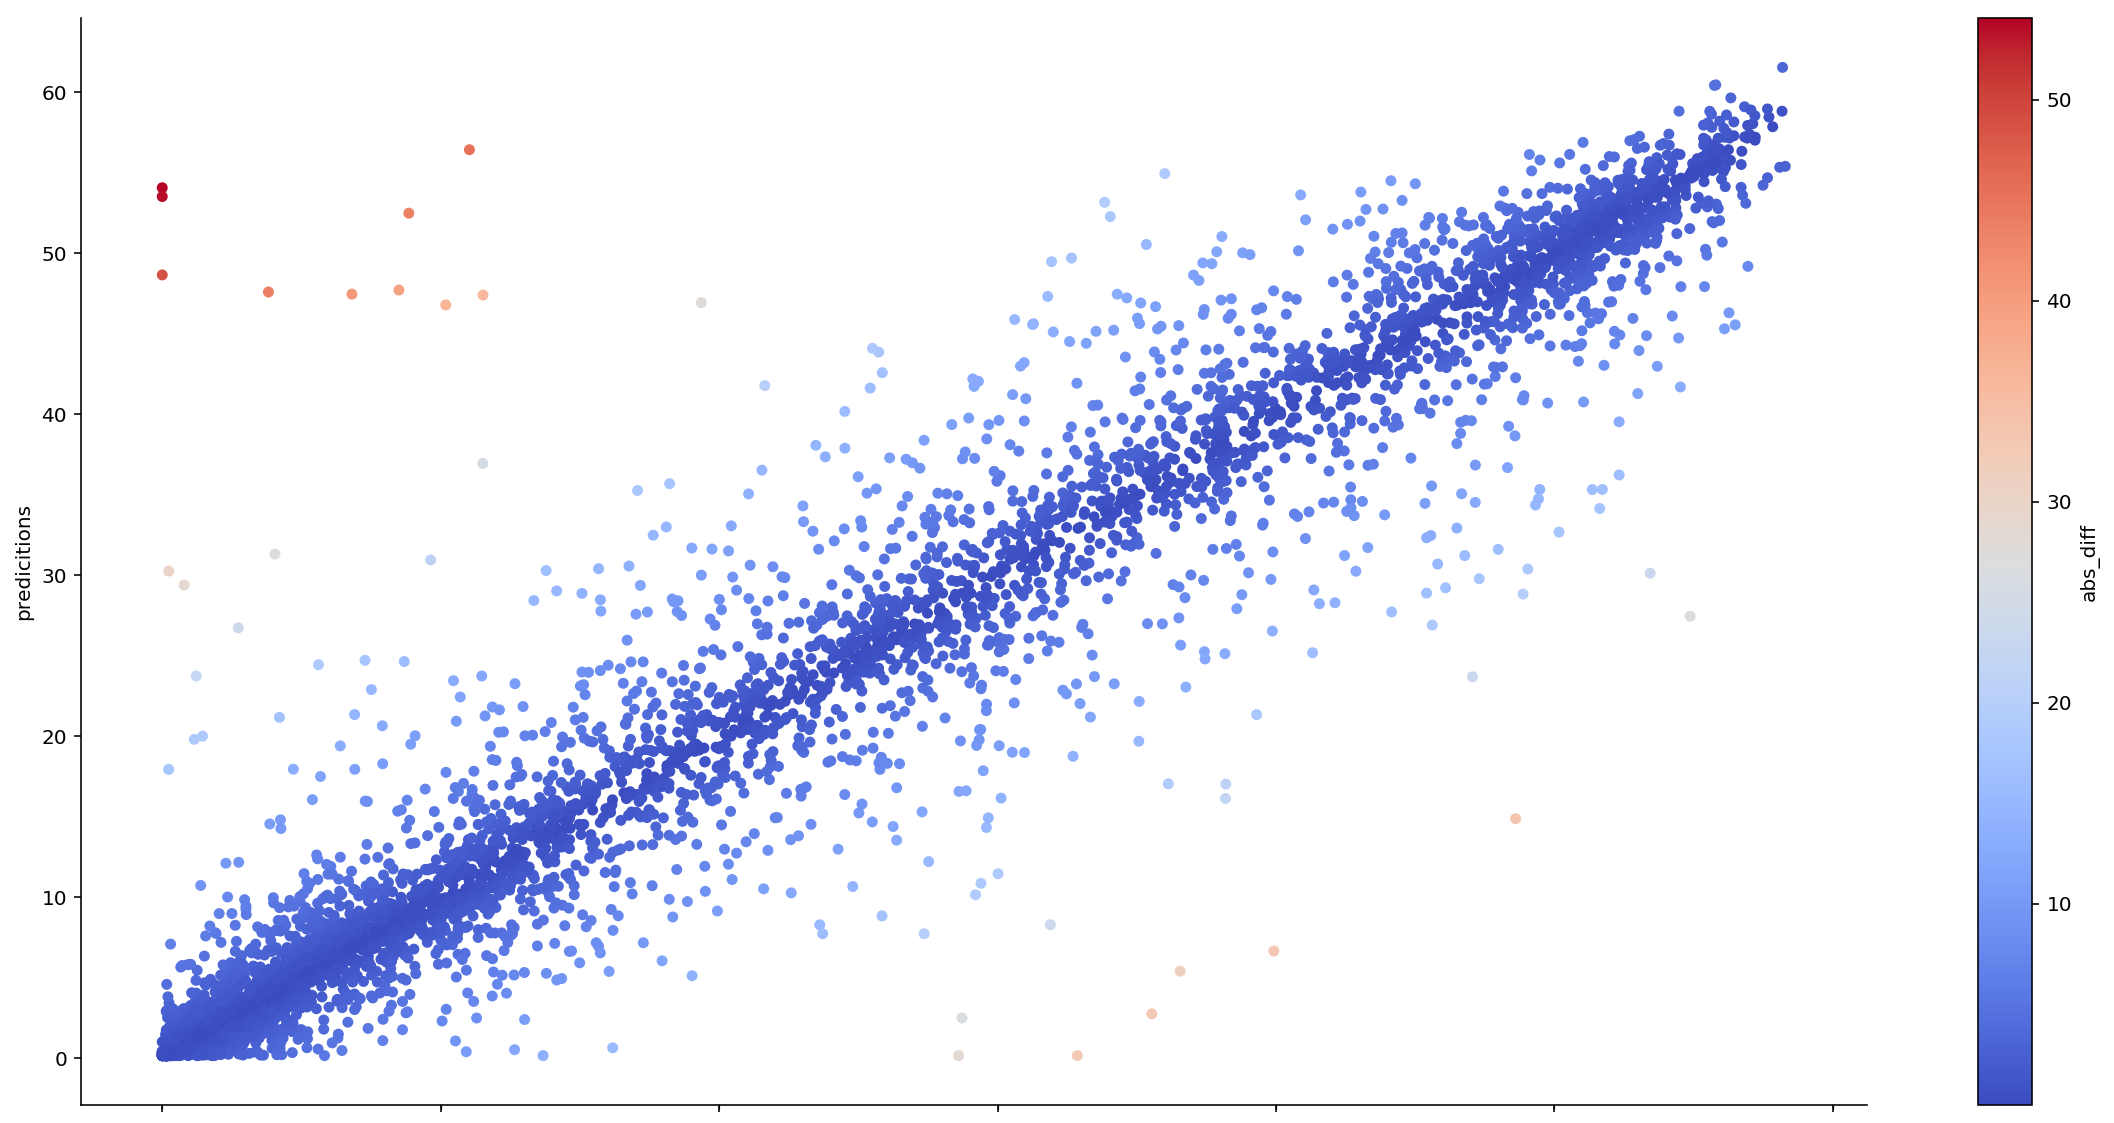

In [51]:
ax = Oversikt_komplett.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model_komplett.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut 1. september

In [52]:
sept = finished_model.predict(x[0:1000,:])

In [53]:
predictions_sept = list(sept)


predictions_sept_list = []
for pred in predictions_sept:
    predictions_sept_list.append(pred[0])

In [54]:
September = pd.DataFrame(data = {'real': y[0:1000], 'predicitions': predictions_sept_list})

In [55]:
September.head()

,predicitions,real
0,27.698551,24.097782
1,26.737806,29.852798
2,28.055407,29.481783
3,28.041540,30.434999
4,29.972229,27.689482


In [56]:
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

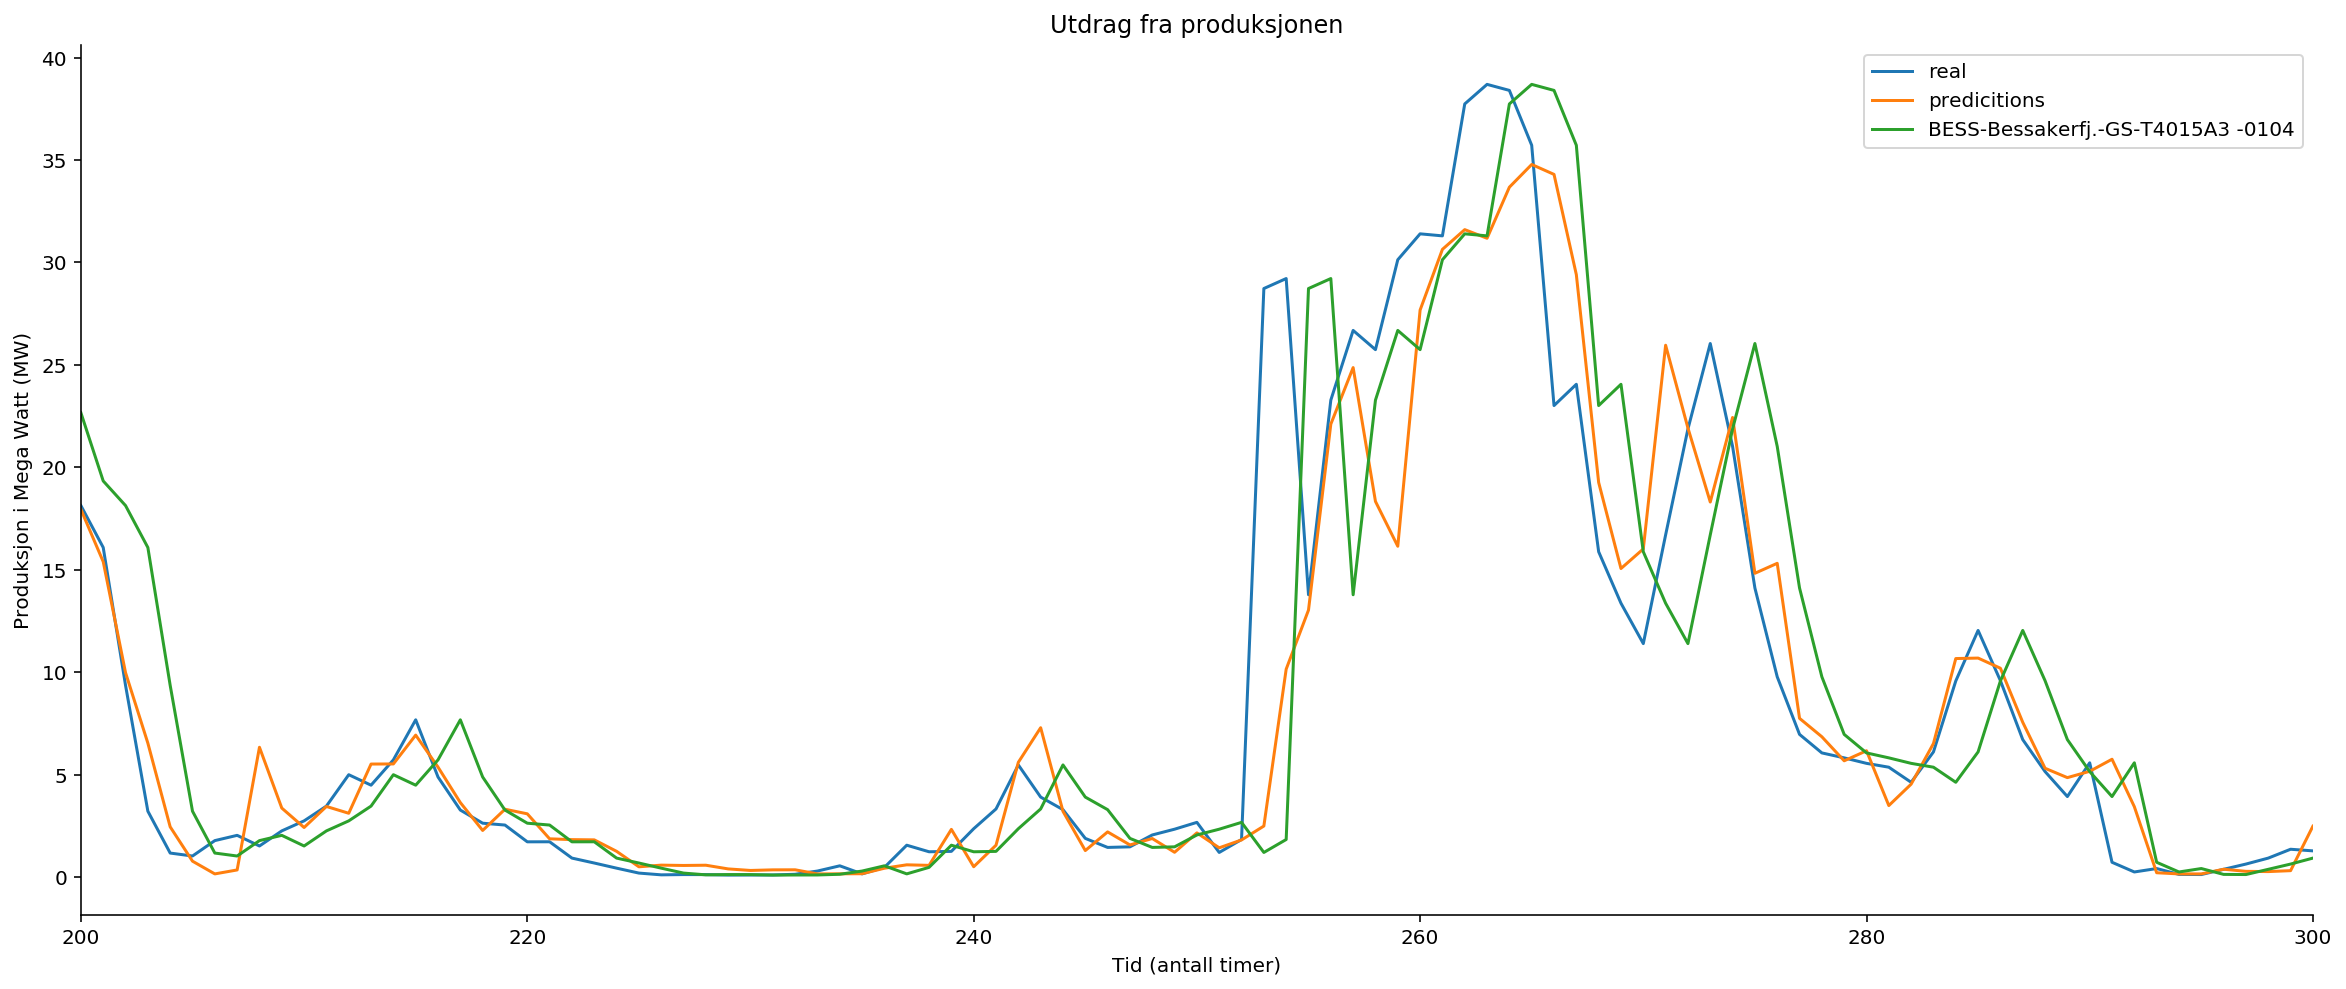

In [57]:
# Justere tidslinjen på plottet
start = 200
slutt = 300

ax = September.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = September.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'BESS-Bessakerfj.-GS-T4015A3 -0104'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra produksjonen')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')

In [58]:
data_raw.head()

,index,BESS-Bessakerfj.-G1-T4015A3 -0104,RRS.S2464.Gunit.M1-7 G1.AVL,BESS-Bessakerfj.-G2-T4015A3 -0104,RRS.S2464.Gunit.M1-7 G2.AVL,BESS-Bessakerfj.-G3-T4015A3 -0104,RRS.S2464.Gunit.M1-7 G3.AVL,BESS-Bessakerfj.-G4-T4015A3 -0104,RRS.S2464.Gunit.M1-7 G4.AVL,BESS-Bessakerfj.-G5-T4015A3 -0104,...,/arome_windvel_6440_1047,DNMI_72580...........T0015A3-0120,/arome_windvel_6447_1156,STORM-Bess-Vindretn-25km,STORM-Bess-Vindhast-25km,/arome_windvel_6422_1040,/arome_airtemp_6422_1040,/arome_windvel_6422_1040.1,/arome_airtemp_6422_1040.1,Target
0,0,1.429567,1,1.530417,1,0.587017,1,1.393733,1,0.593583,...,8.372388,4.0,4.454652,322,8.7,5.189602,8.61660,5.189602,8.61660,24.097782
1,1,1.428450,1,1.675450,1,0.596433,1,1.440050,1,0.600450,...,7.693827,4.3,4.320184,322,8.8,5.052448,8.73037,5.052448,8.73037,29.852799
2,2,1.601617,1,1.681950,1,0.598683,1,1.802783,1,0.595733,...,7.177702,3.6,4.497287,323,8.9,5.894857,8.42202,5.894857,8.42202,29.481782
3,3,1.761867,1,1.763900,1,0.593400,1,1.757700,1,0.597167,...,7.785397,2.9,4.947569,325,9.1,5.470578,8.56190,5.470578,8.56190,30.434999
4,4,1.767500,1,1.919383,1,0.598250,1,1.764233,1,0.596600,...,6.982527,3.0,4.259005,327,9.4,5.622112,8.48257,5.622112,8.48257,27.689482


In [59]:
len(X_test)

1557